
# Johdanto kvanttilaskentaan, kvanttilaskennan lyhyt oppimäärä


$$\renewcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\renewcommand{\bra}[1]{\left\langle{#1}\right|}$$


Tässä artikkelissa esitellään lyhesti 

 1. kvanttietokoneiden toiminan ei-klassiset  periaatteet, joita ovat 
     1. kahden tai useamman kvanttitilan superpositio eli yhdistelmätila, ja
 
     2. kahden kubitin välinen lomittuminen (entanglement) eli kytkentä
 
 
2. Artikkelissa kuvataan yhden kubitin systemi ns. ket-esityksen sekä pystyvektori-esityksen avulla. Samalla käsitellään miten kubitin tilavektorin erilaiset kierrot Blochin pallolla voidaan kuvata esimerkiksi X- ja H kvanttiporttien matriisiesityksen avulla. Matriisilaskentaan liittyvän algebran yksityiskohtia ei käsitellä, koska laskut suoritetaan pythonilla.
 
 
3. Lisäksi määritellään yksikertainen kvanttipiiri python-ohjelmointikielellä IBM Qiskit-ympäristössä.



### Ohje Jupyter-notebookin asentamiseen ja suorittamiseen

Alla on koodilohkoja, joita voit suorittaa artikkelia lukiessasi. Koodilohkon voit suorittaa painamalla yläpaneelista klikkaamalla "run" tai paina ctrl+enter, jolloin aktiivinen solu suoritetaan.

![run](images/run.png)

Testaa myös mitä muista yläpaneelin pikanäppäimistä tapahtuu.

Asennusohje:
1. Asenna <a href="https://www.anaconda.com" target ="_blank"> Anaconda python</a>


2. Kun Omalle koneelle on asennettu paikallinen Jupyter-ympäristö, asenna Qiskit (advanced users):
<a href="https://qiskit.org/documentation/install.html" target ="_blank">IBM QISKIT Installation</a>
    

## Tietokoneessa tieto esitetään bittien avulla
Perinteisten eli klassisten tietokoneiden muistissa kaikki digitaalinen informaatio esitetään bittien avulla, bitin tila voi olla joko  0 tai 1. Klassisten tietokoneiden digitaalisen informaation käsittely eli laskenta suoritetaan tietokoneen sisällä loogisten porttien avulla, jotka on käytännössä toteutettu erilaisilla transistorikytkennöillä.  Nämä muuttavat syötteenä saamansa bitin tai bittien tilaa porttien ulostulolle määritetyn toimintalogiikan mukaisesti. 


>**Kertaavaa tietoa desimaalijärjestelmästä:** Tavallisessa desimaalijärjestelmässä luvut esitetään kantaluvun $10$ potenssien avulla. Luvun esittämisessä käytettyjen numeroiden $0,1,2 ... 9$ paikka ilmaisee ykkösten, kymppien satojen... eli kantaluvun 10 potenssien lukumäärän. Esimerkiksi desimaalijärjestelmän luku $245$ voidaan hajoittaa muotoon:

 >$$ 245= 2\cdot 100+ 4 \cdot 10 + 5\cdot 1 = 2\cdot 10^2 + 4\cdot 10^1 + 5\cdot 10^0$$


Binäärijärjestelmän kantaluku on $2$. Binääriluvussa bitin $0$ tai $1$ paikka ilmaisee mikä kantaluvun $2$ potenssi on kysessä. Esimerkiksi desimaalijärjestelmän luku $11_{10}$ saa binäärijärjestelmässä esitysmuodon $1011_2$ , koska

 $$11_{10} = 8+2+1 = 1 \cdot 2^3+0 \cdot 2^2 +1\cdot 2^1+1\cdot 2^0 = 1011_2$$  
 
Esimerkiksi binääriluku $11001_2$ voidaan muuttaa desimaalijärjestelmän luvuksi seuraavalla algortimilla:

 $$11001_2 = 1\cdot 2^4+ 1\cdot 2^3+0\cdot 2^2+0\cdot 2^1+1\cdot 2^0=16+8+1 = 25_{10}$$


Seuraavassa kuvassa on diodista ja AND-portista rakennettu looginen peruspiiri ja sen toimintalogiikka totuustaulukon avullla esitettynä. Vasemalla on piirin sisääntulobitit ja oikealla piirin ulostulo.
![gate](images/gate.png)


Diodi flippaa eli kääntää (negaatio) sisääntulobitin arvon:
$$\begin{array}{l|l}
A&\overline{A}\\
\hline
1&0\\
0&1
\end{array}$$

AND-portilla on kaksi sisääntuloa, totuustaulu on seuraava:

$$\begin{array}{l|l}
A&B&A\ \wedge B\\
\hline
1&1&\ \ \ \ 1\\
1&0&\ \ \ \ 0\\
0&1&\ \ \ \ 0\\
0&0&\ \ \ \ 0
\end{array}$$

Diodista ja AND-portista rakennettu piirin sisääntulobittejä ovat diodin jälkeen $\overline{A}$ ja $B$.  Piirin toimintalogiikka on siis seuraava:

$$
\begin{array}{l|l|l|c}
A&\overline{A}&B&\overline{A}\wedge B\\
\hline
1&0&1&0\\
1&0&0&0\\
0&1&1&1\\
0&1&0&0
\end{array}
$$



## Kvanttitietokoneen toimintaperiaate

Kvanttikoneessa informaatiota käsitellään mahdollisimman hyvin ympäristöstä eristettyjen kubittien ja niiden tilanmuutoksia ohjaavien kvanttiporttien avulla. Fyysisesti kubitit voivat olla esimerkiksi suprajohtavassa tilassa olevia virtasilmukoita, ionisoituneita atomeja tai elektroneja.  Kvanttitilat ovat hyvin “hauraita”, kvanttimekaanisen tilan aikakehitys häiriytyy äärimmäisen helposti, siksi systeemit joudutaan eristämään ulkoisista magneettikentistä ja jäähdytetään lähelle absoluuttista nollapistettä atomien lämpöliikkeen  minimoimiseksi. Tästä syystä kvanttikoneita ei voi kuvitella edes tulevaisuudessa olevan mahdollista rakentaa henkilökohtaisiksi koneiksi, vaan niitä käytetään kalliiden jäähdytyslaitteiden yhteydessä ja ennen kaikkea internetin kautta. 

Toisena suurena erona on, että jos kvanttitilan tila mitataan, saadaan tilastollisia vastauksia, samalla kvanttitila tuhotaan, ts. se ei enää jatka omaa elämäänsä “kvanttimaailmassa”, vaan tilan kannalta kvanttikoherenssi loppuu.  Kvanttikone voidaan kuitenkin alustaa uudelleen suorittamaan samaa identtistä  “koodia”. Suorittamalla riittävä määrä mittauksia aivan samalla systeemillä, saadaan selville todennäköisimmät lopputilat, joihin kubitit asettautuvat kvanttiporttien vaikutuksesta. Nämä useimmiten esiintyvät tilat ovat kvanttikoneen tulokset. Jos häiriötekijöitä ei onnistuta poistamaan, on lopputuloksissa niin paljon kohinaa, ettei oikeita tuloksia voi enää helposti tunnistaa laskentadatasta. 



## Kubittien superpositio ja lomittuminen ovat kvanttilaskennan perusominaisuuksia


### Superpositio eli yhdistelmätila

Kvanttitietokoneiden muistissa informaatio on esitetty kubittien avulla. Yhden kubitin tila on samanaikaisesti molempien tilojen 0 ja 1 yhdistelmä eli alla olevan yhtälön (1) kuvaama superpositio.  Yhtälön mukaan kubitin tila on  on painotettu summa tiloista 0 ja 1.

$ \ket \psi  = a\cdot\ket{0} + b\cdot \ket{1}\ \ (1)$,


Kubitin tilaa esittää ns. Blochin pallolle piirrety tilavektori $\ket \psi$. Tilavektorin ns. bra-ket-merkintätapa $\ket \psi$ on historiallisesti peräisin fyysikko Paul Diracilta.   Vektoria  $\ket \psi $ kutsutaan jatkossa ns. ket-tilavektoriksi.  Yhtälö (1) esittämä kubitin tila on tilojen 0 ja 1 superpositio eli yhdistelmä. Tämä tarkoittaa, että ennen mittausta kubitti ei ole kummassakaan tilassa 0 tai 1. On yhtä pitävää sanoa, että kubitti on samanaikaisesti sekä tilassa 0 ja 1.

Kubitin lopullinen tila määräytyy vasta kun kvanttitietokoneessa mitataan kubitin sisältämä informaatio ja tallennetaan se klassisen tietokoneen muistiin. Kun kubitin tila mitataan, kubitin superpositiotila hajoaa, ja kubitti valitsee jommankumman mahdollisen lopputilan 0 tai 1. Tilavektorin $\ket \psi $ kertoimien $a$ ja $b$ neliöt $a^2$ ja $b^2$ ilmaisevat todennäköisyydet saada mittaustapahtumassa tulos 0 tai 1 seuraavasti:

$P(0)=a^2$ ja $P(1)=b^2$.

Huomaa, että kertoimet $a$ ja $b$ voivat olla imaginaarilukuja, mutta lukujen neliöt ovat aina reaalilukuja. Imaganaariyksikkö $i$ toteuttaa ehdon $i^2 = -1$.

Mittauksessa kubitti valitsee jommankumman mahdollisen tilan, joten mahdollisten lopputulosten todennäköisyyksien summa on yksi:

$P(0)+P(1)=1$

Tarkastellaan kubittia, joka on preparoitu eli valmisteltu (kvanttiporttien avulla) tilaan $\ket \psi = \frac{1}{\sqrt{2}}(\ket 0 + i \ket 1)$.  Kubitti on piirretty alla olevaan kuvaan (huomaa $\frac{1}{\sqrt{2}} \approx 0.71$). Lasketaan mahdollisten mittaustulosten todennäköisyydet.

In [28]:
from IPython.display import IFrame

IFrame(src='https://bloch.ollpu.fi/?sqrt(1/2)&-i*sqrt(1/2)', width=600, height=400)

Mittaustuloksen 0 todennäköisyys:
$P(0)=(\frac{1}{\sqrt{2}})^2=\frac{1}{2}$ ja 

Mittaustuloksen 1 todennäköisyys:
$P(1)=-(i\frac{1}{\sqrt{2}})^2=-1\cdot (i)^2 \cdot \frac{1}{2}=\frac{1}{2}$

Koska kubitin tilan mittauksessa superpositiotila hajoaa, ja kubitti päätyy jompaan kumpaan tilaan, on mahdollisten mittaustulosten todennäköisyyksien summa 1, eli $P(0)+P(1)=1$.


### Lomittuminen kubitin ominaisuutena

Toinen kvanttiteoriaan perustuva ei-klassinen piirre on kahden (tai usemman) kubitin lomittuminen (quantum entanglement):  Kun kvanttisysteemin tila kuvataan kahden  lomittuneen kubitin avulla, niin ensimmäisen kubitin tilan määritys mittaamalla aiheuttaa samalla toisen kubitin tilan määräytymisen.  Lomittuneiden kubittiparien lopputilat eivät valikoidu toisistaan riippumatta, kubittiparin lopputilojen määräytymistä ohjaa tilojen kytkeytyminen. Lomittumista tarkastellaan lisää myöhemmin tässä artikkelissa kahden kubitin kvanttisysteemissä.



### Klassisen tietokoneen ja kvanttitietkoneen erot laskentatehossa

Tarkastellaan mikä on klassisen ja kvanttikoneen ero laskentatehossa. Jos klassisen tietokoneen muistissa $n$ bittiä, se voi laskea kerrallaan vain yhden mahdollisen tilan $2n$ vaihtoehdosta (bitin tilat ovat 0 tai 1).  Jos kvanttitietokoneen muistissa on $n$ kubittia, niin se voi samanaikaisesti tutkia  $2^n$  tilan ratkaisun. Tätä eroa havainnollistetaan usein labyrinttiesimerkillä, jossa tietokoneen on laskettava reitti labyrintin läpi. Kun klassisen tietokoneen on käytävä läpi yksitellen kaikki mahdolliset reittivaihtoehdot, niin vastaavasti kvanttitietokone laskee yhdellä kerralla kaikki vaihtoehdot,  ja löytää heti ratkaisun.

## Yhden kubitin kvanttipiiri ja X-portti sekä 180 asteen kierto Blochin pallolla x-akselin ympäri

Kvanttitietokoneen muistissa tieto esitetään kubittien avulla. Kubitin perustilat ovat ket-vektorit $\ket 0$ ja $\ket{1}$, ja ne voidaan esitettää pystyvektoreina

$$
\begin{align}
\ket 0 &= \begin{pmatrix} 1 \\ 0 \end{pmatrix} \\
\ket 1 &= \begin{pmatrix} 0 \\ 1 \end{pmatrix}.
\end{align}
$$

Kubitin tilaa voidaan muuttaa kvanttiporteilla. Ensimmäiseksi tutkitaan NOT-porttia, jonka matriisiesitys on seuraava:

$$
X=\begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}
$$

Kun $X$-kvanttiportti operoi kubittiin, niin kubitin tila muuttuu käänteiseksi (bit-flip gate), eli

$$
X\ket 0 = \ket 1 \\
X\ket 1 = \ket 0
$$


Matriisi $X$ on siis kuvaus, joka kuvaa tilan $\ket 0$ tilaksi $\ket 1$. Geometrisesti tämä voidaan tulkita $180^o$ kierroksi Blochin pallolla.

**Tutki** X kvanttiportin vaikutusta tilassa $\ket 0$ olevan kubitin tilaan alla olevalla sovelluksella. Kierto saa nimensä siitä, minkä akselin ympäri kubitin tilavektoria kierretään $180^o$ Blochin pallolla. Esimerkiksi X-akselin ympärit tapahtuvan kierron saat tehtyä painamalla sovelluksen oikeasta reunasta olevaa nappia.

Huomaa ja testaa, että kaksi peräkkäistä X -kiertoa kumovat toisensa vaikutukset, jolloin kubitin alkutila ja lopputila ovat sama. 


In [29]:
from IPython.display import IFrame

IFrame(src='https://bloch.ollpu.fi', width=600, height=400)

Osoitetaan, että kaksi peräkkäistä $180^o$ kiertoa kumoavat toisensa. Tämä tehdään laskemalla matriisien tulo $XX=I$, missä $I$ on yksikkömatriisi.

$$
I=\pmatrix {1 & 0 \\ 0 & 1}
$$

Matriisiesityksen avulla:
$$\left(\begin{matrix}
0&1\\
1&0
\end{matrix}\right)\left(\begin{matrix}
0&1\\
1&0
\end{matrix}\right)=\left(\begin{matrix}
1&0\\
0&1
\end{matrix}\right)$$

Kun kubitin tilaa esittävä pystyvektori kerrotaan yksikkömatriisilla $I$, niin kubitin tila ei muutu.

>**Lisätietoa matriisilaskennan algebrasta:** $2x2$ matriisin $\left(\begin{matrix}
a&b\\
c&d
\end{matrix}\right)$ ja pystyvektorin $\left(\begin{matrix}
x\\
y
\end{matrix}\right)$ tulo lasketaan seuraavasti:


>$$\left(\begin{matrix}
a&b\\
c&d
\end{matrix}\right)\left(\begin{matrix}
x\\
y
\end{matrix}\right)=\left(\begin{matrix}
ax+by\\
cx+dy
\end{matrix}\right)$$



Seuraavassa X-matriisin $\left(\begin{matrix}
0&1\\
1&0
\end{matrix}\right)$ ja pystyvektorin $\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ lasketaan pythonin avulla.

In [30]:
from numpy import matrix
from math import sqrt
from qiskit.visualization import array_to_latex as latex

# määritellään pystyvektorina kubitin kvanttitila 0:
q0 = matrix([[1],[0]])
# määritellään pystyvektorina kvanttitila 1:
q1 = matrix([[0],[1]])
print("kubitin tila 0 pystyvektorina:")
#latextulostus
latex(q0)

kubitin tila 0 pystyvektorina:


<IPython.core.display.Latex object>

In [31]:
X = matrix([
    [0, 1],
    [1, 0]
])
print("Matriisi X:")
# Tulostetaan matriisi latexin avulla
latex(X)

Matriisi X:


<IPython.core.display.Latex object>

In [32]:
print("Lasketaan X-portin vaikutus kubitin tilaan 0:")
# Tässä lasketaan X ja q0 tulo ja tulostetaan vastaus:
latex(X*q0)

Lasketaan X-portin vaikutus kubitin tilaan 0:


<IPython.core.display.Latex object>

Yllä laskettiin matriisien avulla $X\ket 0 = \ket 1$:

$\left(\begin{matrix}
0&1\\
1&0
\end{matrix}\right)\left(\begin{matrix}
1\\
0
\end{matrix}\right)=\left(\begin{matrix}
0\\
1
\end{matrix}\right)$

Vastaavasti voidaan laskea matriisien avulla $X\ket 1 = \ket 0$.




### Muita kvanttiportteja ja kiertomatriiseja

Y-portti vastaa kubitin tilavektorin kiertoa Blochin pallolla $180^o$ y-akselin ympäri . Y-portin matriisiesitys on seuraava:

$$
Y=\pmatrix {0 & -i \\ i & 0}
$$

Merkintä $i$ on kompleksilukuihin liittyvä imaginaariyksikkö, jolle on voimassa $i^2 = -1$. 


Vastaavasti Z-portti vastaa kubitin tilavektorin kiertoa Blochin  $180^o$ kiertoa z-akselin ympäri. Z-portin matriisiesitys on seuraava:

$$
Z=\pmatrix {1 & 0 \\ 0 & -1}
$$

### Simulaation avulla ratkaistavia pohdintatehtäviä
a) Tutki simulaation avulla miten alkutilassa $\ket 0$ oleva tilavektori  kierttyy X, Y, Z porttien vaikutuksesta Blochin pallolla x,y,z-akselien ympäri.

b) Ratkaise simulaation avulla: Jos kubitin alkutila on $\ket 0$, niin mikä on kubitin lopputila seuraavien porttien operaatioiden eli kiertojen jälkeen? Kiinnitä huomiota minkä akselin ympäri portti kiertää kubittia, ja vaikuttaako kyseinen kierto kubitin tilaan?
![kubit_xyz.png](images/kubit_xyz.png)

c) Tutustu simulaation avulla myös tärkeään Hadamard-porttiin eli H-porttiin, joka on 180 asteen kierto xz-tason lävistäjän ympäri!

d) Huomaa, että kaikkia portteja ei tarvitse toteuttaa oikeassa kvanttitietoneessa. Esimerkiksi kolmen portin yhdistelmä HZH voidaan korvata X-portilla:

$Y = HZH$

Testaa tämä simulaattorilla: Onko Y -kierto sama kuin HZH.

Kokeile erilaisia kiertoja simulaatiolla. Alkutilassa kubitti on tilassa $\ket 0$. 

In [33]:
from IPython.display import IFrame

IFrame(src='https://bloch.ollpu.fi', width=600, height=400)

## Hadamard eli H-portti ja kubitin superpositiotilat

Hadamard eli H-kvanttiportti on kierto xz-tason lävistäjän suhteen. Hadamard-kvanttiportti muuttaa kubitin tilat $\ket 0$ ja $\ket 1$ superpositioon seuraavasti:

$$
H\ket 0 = \frac{1}{\sqrt 2} (\ket 0 +  \ket 1) = \ket +   \\
H\ket 1 = \frac{1}{\sqrt 2} (\ket 0 -  \ket 1) = \ket -
$$

Huomaa, että näitä kyseisiä tiloja merkitään välillä myös $\ket +$ ja $\ket -$.

$H$-portin matriisiesitys on seuraava:

$$
H = \frac{1}{\sqrt 2} \pmatrix {1 & 1 \\ 1 & -1}
$$


Lasketaan matriisiesitystä käyttäen, että

$$
\begin{align}
H\ket 0 &= \ket + \text{ja} \\
H\ket 1 &= \ket -.
\end{align}
$$


Eli muodostetaan uudet kantavektorit $\ket +$ ja $\ket +$ kertomalla H-matriisilla alkuperäiset kantavektorit $\ket 0$ ja $\ket 1$ :

$$
\ket + = \frac{1}{\sqrt 2} (\ket 0 +  \ket 1) = \frac{1}{\sqrt 2} \pmatrix {1  \\ 1}  \\
\ket - = \frac{1}{\sqrt 2} (\ket 0 -  \ket 1) = \frac{1}{\sqrt 2} \pmatrix {1  \\ -1 }
$$

Kvainttiportit X, Y, Z, ja H ovat unitaarisia, mikä fysikaalisesti tarkoittaa, että kubitin tilavektorien kierrot säilyttävät todennäköisyyden, eli mittaustulosten todennäköisyyksien summa on 1. Matemaattisesti tämä tarkoittaa, että X, Y, Z ja H ovat itsensä käänteismatriiseja, esim. tulo $H*H=I$ on yksikkömatriisi $I$.

In [34]:
H =  1/sqrt(2)*matrix([[1, 1],[1, -1]])
latex(H)

<IPython.core.display.Latex object>

In [35]:
#pystyvektori 0 määriteltiin aiemmin seuraavasti:
latex(q0)

<IPython.core.display.Latex object>

In [36]:
#pystyvektori 1 määriteltiin seuraavasti:
latex(q1)

<IPython.core.display.Latex object>

In [37]:
# muodostetaan superpositiotila + kertomalla H matriisilla tila 0:
latex(H*q0)

<IPython.core.display.Latex object>

In [38]:
# muodostetaan superpositiotila - kertomalla H matriisilla tila 1:
latex(H*q1)

<IPython.core.display.Latex object>

In [39]:
# Kierto H on unitaarinen, eli H*H=I, missä I on identiteettimatriisi:
latex(H*H)

<IPython.core.display.Latex object>

## Lomittuminen (entanglement) ja CNOT-portti

Seuraavaksi tarkastelemme controlled NOT -porttia ($\mathit{CNOT}$), joka on kahden kubitin välinen operaatio. Kahden kubitin kvanttipiirissä systeemin tila esitetään seuraavilla kantavektoreilla:

$$
\ket{00},\ \ket{01},\ \ket{10},\ \ket{11}, 
$$

missä 

$$
\ket{00}=\pmatrix{1 \\ 0 \\ 0 \\0},\ \ket{01}=\pmatrix{0 \\ 1 \\ 0 \\0},\ 
\ket{10}=\pmatrix{0 \\ 0 \\ 1 \\0},\ \ket{11}=\pmatrix{0 \\ 0 \\ 0 \\1}.
$$

$\mathit{CNOT}$-portin operoidessa ensimmäinen qubitti on ns. ohjaava kubitti (control qubi1t), ja jälkimmäinen on kohdekubitti (target qubit). $\mathit{CNOT}$ vaikuttaa koko systeemin tilaan seuraavasti:

$$
\ket{00} \rightarrow  \ket{00}   \\
\ket{01} \rightarrow  \ket{01}   \\
\ket{10} \rightarrow  \ket{11}   \\
\ket{11} \rightarrow  \ket{10}   \\
$$

Tulos tarkoittaa, että jos ensimmäinen, ns. ohjaava kubitti on $0$, niin kohdekubitin tila ei muutu. Jos ohjaavakubitti $1$, niin kohdekubitin tila muuttuu. 

$\mathit{CNOT}$-portin matriisiesitys on seuraava:

$$
\mathit{CNOT} = \pmatrix {1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0\\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} 
$$

Huomaa, että vaikka matriisia merkitään monella kirjaimella, se ei ole monen matriisin tulo.

Piirrosmerkki, jossa ylempänä esitetty kubitti on ohjaava, ja alempi toimii kohteena:


![cnot](images/cnot.png)



>**Lisätietoa:** Yllä esitetyt kahden kubitin tilaa esittävien ket-vektorit ja pystyvektorit perustuvat siis seuraavaan tensoritulon $\otimes$ määritelmään:


>$$ \ket a = \begin{pmatrix} a_0 \\ a_1 \end{pmatrix}, \quad \ket b = \begin{pmatrix} b_0 \\ b_1 \end{pmatrix} $$

>$$ 
\ket {ba} = \ket b\otimes \ket a = \begin{pmatrix} b_0 \times \begin{pmatrix} a_0 \\ a_1 \end{pmatrix} \\ b_1 \times \begin{pmatrix} a_0 \\ a_1 \end{pmatrix} \end{pmatrix} = \begin{pmatrix} b_0 a_0 \\ b_0 a_1 \\ b_1 a_0 \\ b_1 a_1 \end{pmatrix}
$$

>Esimerkiksi 
>$$ 
\ket {00} = \ket 0 \otimes \ket 0= \begin{pmatrix} 1 \cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix} \\ 0 \cdot \begin{pmatrix} 1 \\ 0 \end{pmatrix} \end{pmatrix} = \begin{pmatrix} 1\cdot 1 \\ 1\cdot 0 \\ 0 \cdot 1 \\ 0 \cdot 0 \end{pmatrix}=\begin{pmatrix} 1 \\ 0 \\0\\0 \end{pmatrix} 
$$

In [40]:
CNOT =  matrix([[1,0, 0,0],[0, 1, 0,0], [0, 0, 0,1], [0, 0, 1,0]])
latex(CNOT)

<IPython.core.display.Latex object>

In [41]:
# määritellään pystyvektorina kubitin kvanttitila |00>:
q00 = matrix([[1],[0],[0],[0]])
latex(q00)



<IPython.core.display.Latex object>

In [42]:
# määritellään pystyvektorina kubitin kvanttitila |01>:
q01 = matrix([[0],[1],[0],[0]])

# |10>
q10 = matrix([[0],[0],[1],[0]])

# |11>

q11 = matrix([[0],[0],[0],[1]])
# tulostetaan tila 10:
latex(q10)

<IPython.core.display.Latex object>

In [43]:
#tulostetaan tila 11
latex(q11)

<IPython.core.display.Latex object>

Tunnista missä tilanteissa ohjaavakubitti vaihtaa kohdekubitin tilaa. Vertaa piirin toimintaa ket-merkintään:
 
 $$
\ket{01} \rightarrow  \ket{01} \text{eli laske tulo  } \mathit{CNOT} \ket{01}  \\
\ket{10} \rightarrow  \ket{11}  \text{eli laske tulo  } \mathit{CNOT} \ket{10} \\
$$

In [44]:
# CNOT 01 --> 01
latex(CNOT*q01)

<IPython.core.display.Latex object>

In [45]:
# CNOT 10 --> 11
latex(CNOT*q10)

<IPython.core.display.Latex object>

## Kvanttipiirin määrittely IBM qiskit -ympäristössä.

Seuraavaksi tutkimme esimerkin avulla mitä tarkoitetaan kvanttipiirillä, joka rakentuu systeemin tilan kuvaamiseksi tarvittavista kubiteista ja ns kvanttiporteista, joiden avulla rakennetaan kubittien väliset kytkennät ja määritetään kvanttipiirin kuvaaman kvanttialgoritmin toiminta. Kvanttipiiri määritellään IBM Qiskit -ohjelmointiympäristössä python-ohjelmointikielellä. Kun IBM:n ohjelmointiympäristö Qiskitin työkalut on asennettu omalle koneelle, jossa tehdään kvanttipiirin määrittely ja piirin toiminnan simulointi.  Tämän jälkeen kvanttipiiri on mahdollista lähettää verkon yli oikealle kvanttitietokoneelle suoritettavaksi.

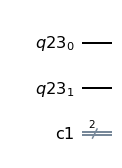

In [46]:
# Etene vaiheittain, suorita koodilohkot painamalla Run-nappia ylhäältä.

from qiskit import *
# Luodaan 2 kubittia ja 2 klassista rekisteriä jonne tallenetaan mittaustulokset. Kubittien alkutila on 0
quantum_register = QuantumRegister(2)
classical_register = ClassicalRegister(2)
circuit = QuantumCircuit(quantum_register, classical_register)

%matplotlib inline
circuit.draw(output='mpl')

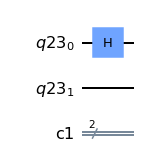

In [47]:
# Lisätään Hadamard-portti H 
circuit.h(quantum_register[0])
circuit.draw(output='mpl')

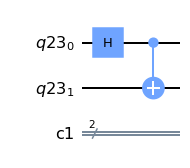

In [48]:
# Lisätään kvanttipiiriin CNOT-portti cx()-komennolla
#kubitti 0 on ohjaava kubitti, ja 1.kubitti on kohde
circuit.cx(quantum_register[0], quantum_register[1])
circuit.draw(output='mpl')

Koodissa luodaan kahden kubitin kvanttipiiri. Kubitia q0 operoidaan Hadamard-portilla, jolloin kubitti q0 asettuu tilojen 0 ja 1 superpositioon. Kubittien q0 ja q1 välille muodostetaan lomittuminen eli kytkentä ns CNOT-portilla (Controlled NOT). Kvanttipiirin piirroksessa kytkennässä ylempi (pisteellä merkitty) kubitti q0 on ohjaava kubitti ja q1 ja alempi (+ merkillä ) toimii kohteena. Kvantipiirin toiminnan aikakehitys esitetään piirroksena, jota luetaan kuin nuottiviivastoa vasemmalta oikealle.

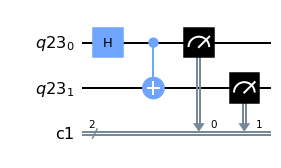

In [49]:
# Mitataan molemmat kubitit, ja tallennetaan tulokset klassiseen rekisteriin
circuit.measure(quantum_register, classical_register)
circuit.draw(output='mpl')

Koodissa kvanttirekisterien tila mitataan ja mittaustulokset tallennetaan klassisen tietokoneen rekisteriin cl. Koska kubittien q0 ja q1 välillä on kytkentä, niin ohjaavan kubitin q0 mittaustulos vaikuttaa siihen mihin tilaan kubitti q1 asettuu mittauksessa. 

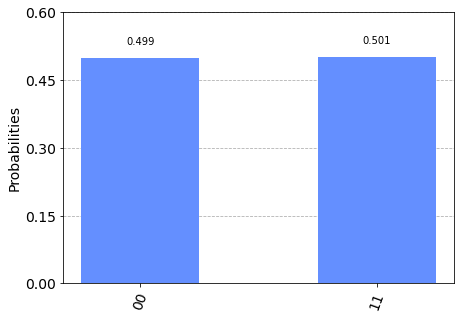

In [50]:
# Simuloidaan piirin toiminta.
simulator = Aer.get_backend('qasm_simulator')
execute(circuit, backend=simulator)
result = execute(circuit, backend=simulator).result()
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circuit))

Tulos tarkoittaa, että jos ensimmäinen, ns. ohjaava kubitti on 0, niin kohdekubitin tila ei muutu. Jos ohjaavakubitti on tilassa 1, niin kohdekubitin tila muuttuu.

Simuloinnin tuloksista havaitaan, että mittauksessa kvanttipiiri asettuu 50% todennäiköisyydellä tilaan, jossa molempien kubittien tila on 0 , tai 50% todennäköisyydellä tilaan jossa molempien kubittien lopputilaksi mitattiin 1. Tulokset eivät välttämättä jakaudu aivan tasan 50 % ja 50 %, jos simuloinnissa kvanttipiirin toimintaa simuloidaan rajallisella määrällä kierroksia. Tämän simuloinnin jälkeen koodissa määritetty kahden kubitin kvanttipiiri on mahdollista lähettää verkon yli oikean kvanttitietokoneen suoritettavaksi.

![tulokset](images/tulokset.png)

Kuvassa on esitetty tulokset, jotka on saatu suorittamalla algoritmi oikella kvanttikoneella (1.11.2020). Tuloksista nähdään, että oikea kvanttikone saa laskennan tulokseksi myös virheellisiä arvoja 01 ja 10.

In [51]:
%%html
<iframe src="https://bloch.ollpu.fi" width="600" height="500"></iframe>